In [1]:
#Importing libraries


In [2]:
# Dataframe
import pandas as pd

# Array
import numpy as np

# Decompress the file
import gzip

# Visualizations
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import matplotlib.colors as colors
%matplotlib inline

# Datetime
from datetime import datetime

## Warnings
import warnings
from scipy import stats
warnings.filterwarnings('ignore')
## Modeling
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from catboost import CatBoostClassifier, Pool
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from  sklearn.metrics import precision_recall_fscore_support
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from tqdm import tqdm
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.dummy import DummyClassifier


In [3]:
review_df = pd.read_csv('sample30.csv')

In [4]:
review_df.head(2)

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive


In [5]:
#Inspecting data
review_df.shape

(30000, 15)

In [6]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), object(14)
memory usage

### Exploratory Data Analysis

Text(0, 0.5, 'Number of Reviews')

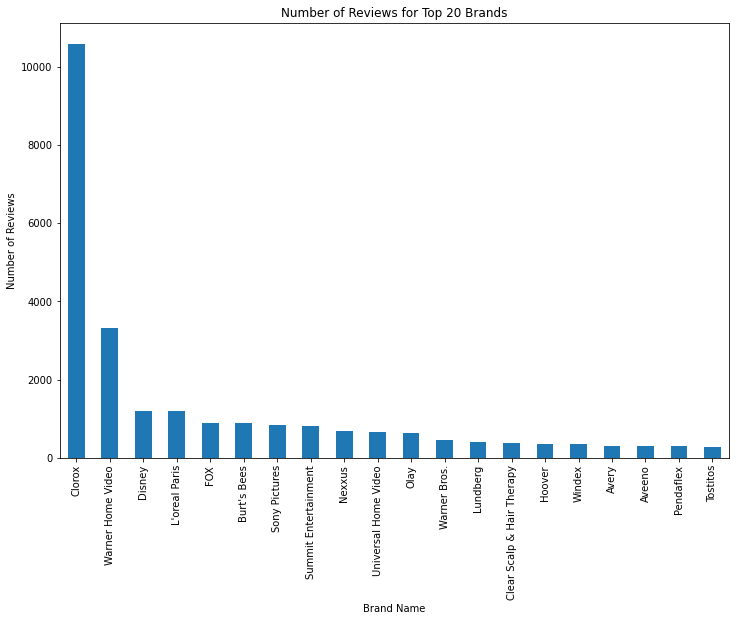

In [7]:
#Number of reviews per brand
brands = review_df["brand"].value_counts()
plt.figure(figsize=(12,8))
brands[:20].plot(kind='bar')
plt.title("Number of Reviews for Top 20 Brands")
plt.xlabel('Brand Name')
plt.ylabel('Number of Reviews')

Text(0, 0.5, 'Number of Reviews')

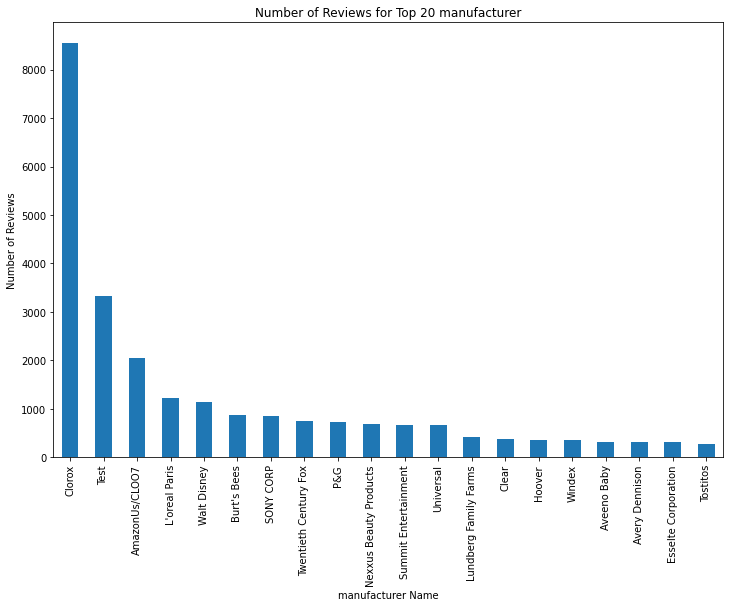

In [8]:
#Number of reviews per manufacturer
manufacturer = review_df["manufacturer"].value_counts()
plt.figure(figsize=(12,8))
manufacturer[:20].plot(kind='bar')
plt.title("Number of Reviews for Top 20 manufacturer")
plt.xlabel('manufacturer Name')
plt.ylabel('Number of Reviews')

Text(0, 0.5, 'Number of Reviews')

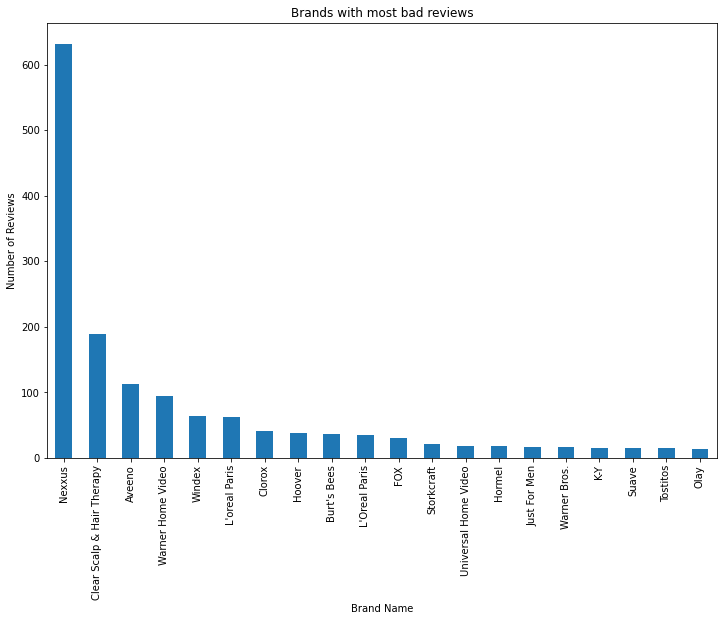

In [9]:
#Brands with the most number of bad reviews
bad_ratings = review_df[(review_df['reviews_rating']<3)]
brands = bad_ratings["brand"].value_counts()
plt.figure(figsize=(12,8))
brands[:20].plot(kind='bar')
plt.title("Brands with most bad reviews")
plt.xlabel('Brand Name')
plt.ylabel('Number of Reviews')

Text(0, 0.5, 'Number of Reviews')

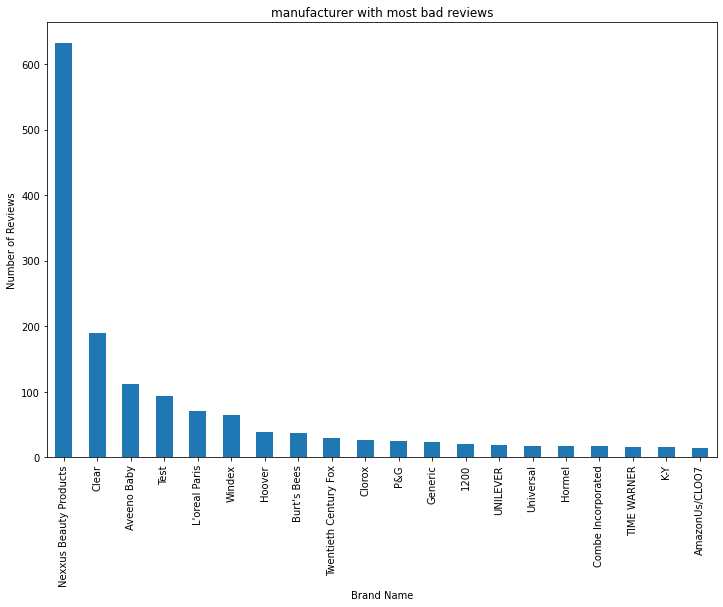

In [10]:
#manufacturer with the most number of bad reviews
brands = bad_ratings["manufacturer"].value_counts()
plt.figure(figsize=(12,8))
brands[:20].plot(kind='bar')
plt.title("manufacturer with most bad reviews")
plt.xlabel('Brand Name')
plt.ylabel('Number of Reviews')

Text(0, 0.5, 'Number of Reviews')

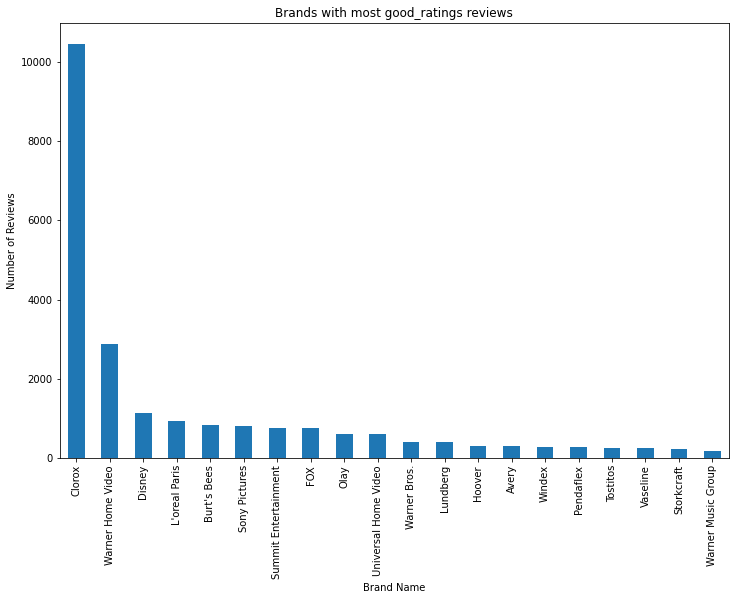

In [11]:
#Brands with the most number of good reviews
good_ratings = review_df[(review_df['reviews_rating']>3)]
brands = good_ratings["brand"].value_counts()
plt.figure(figsize=(12,8))
brands[:20].plot(kind='bar')
plt.title("Brands with most good_ratings reviews")
plt.xlabel('Brand Name')
plt.ylabel('Number of Reviews')

Text(0, 0.5, 'Count')

<Figure size 720x432 with 0 Axes>

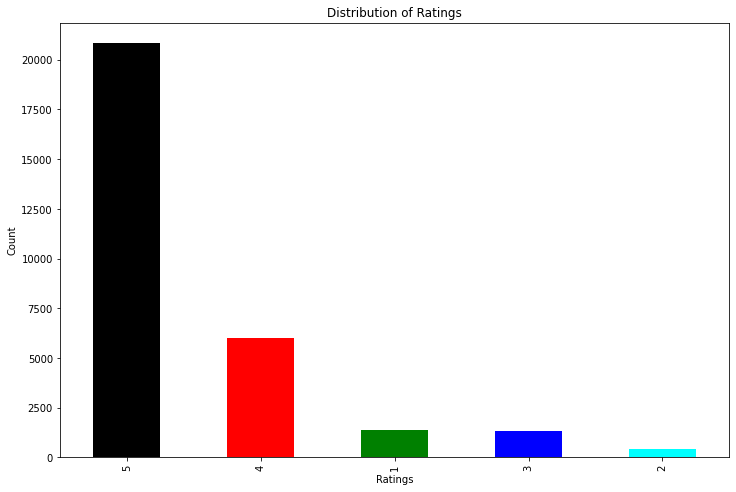

In [12]:
#Distribution of ratings
plt.figure(figsize = (10,6))
brands = review_df["reviews_rating"].value_counts()
plt.figure(figsize=(12,8))
brands[:20].plot(kind='bar',color=['black', 'red', 'green', 'blue', 'cyan'])
plt.title("Distribution of Ratings")
plt.xlabel('Ratings')
plt.ylabel('Count')

In [13]:
# Create a year column and drop time column
review_df['year'] = review_df['reviews_date'].astype(str).str[:4]
review_df = review_df.drop('reviews_date', axis = 1)
review_df.head(2)

,id,brand,categories,manufacturer,name,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment,year
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive,2012
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive,2017


Text(0, 0.5, 'Number of Reviews')

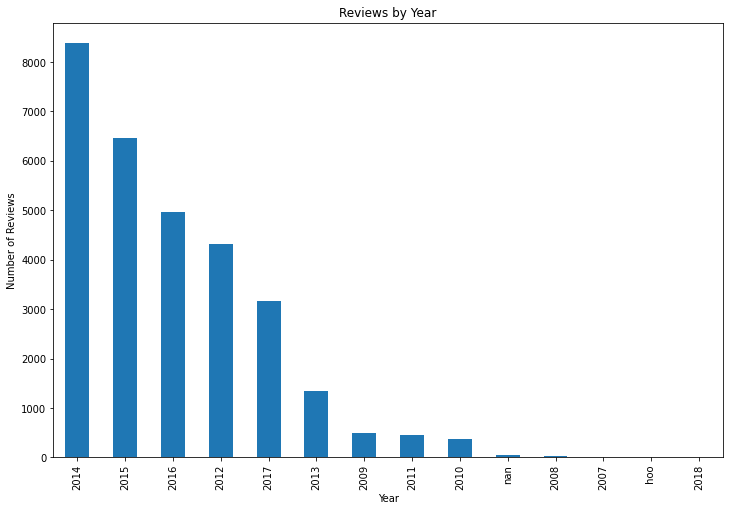

In [14]:
# Check distribution of ratings by year
year = review_df["year"].value_counts()
plt.figure(figsize=(12,8))
year.plot(kind='bar')
plt.title("Reviews by Year")
plt.xlabel('Year')
plt.ylabel('Number of Reviews')

Text(0, 0.5, 'Number of Reviews')

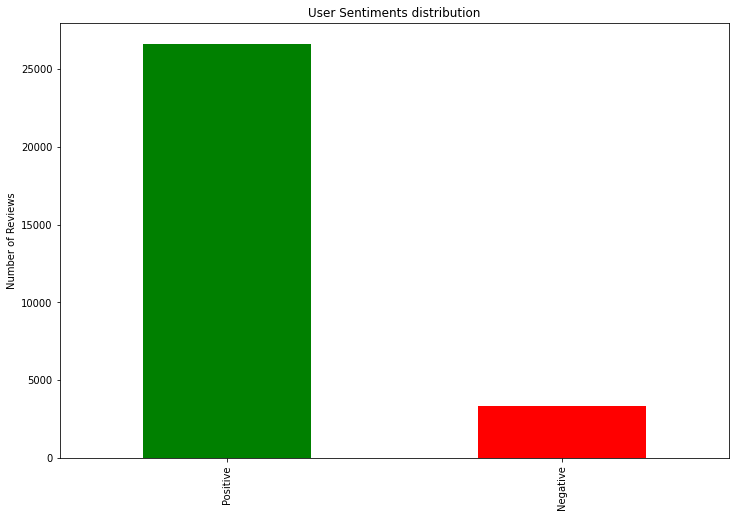

In [15]:
# Distribution of User Sentiments
user_sentiment = review_df["user_sentiment"].value_counts()
plt.figure(figsize=(12,8))
user_sentiment.plot(kind='bar',color=['green', 'red'])
plt.title("User Sentiments distribution")
plt.ylabel('Number of Reviews')

As we see there is a data imbalance which we have to address

### Data Cleaning

In [16]:
##Using only necessary columns for our Models

In [17]:
reviews = review_df[['id','reviews_didPurchase','reviews_rating','reviews_text','reviews_title','reviews_username','name','user_sentiment']]

In [18]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   30000 non-null  object
 1   reviews_didPurchase  15932 non-null  object
 2   reviews_rating       30000 non-null  int64 
 3   reviews_text         30000 non-null  object
 4   reviews_title        29810 non-null  object
 5   reviews_username     29937 non-null  object
 6   name                 30000 non-null  object
 7   user_sentiment       29999 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.8+ MB


##### We shall remove those records for which there are missing values for the reviews_didPurchase columns. This will help us in keep checks of reviews generated by bots and fake sellers

In [19]:
# Missing value imputations
reviews = reviews[reviews['reviews_didPurchase'].notna()]

In [20]:
reviews.head(3)

,id,reviews_didPurchase,reviews_rating,reviews_text,reviews_title,reviews_username,name,user_sentiment
1,AV14LG0R-jtxr-f38QfS,True,5,Good flavor. This review was collected as part...,Good,dorothy w,Lundberg Organic Cinnamon Toast Rice Cakes,Positive
2,AV14LG0R-jtxr-f38QfS,True,5,Good flavor.,Good,dorothy w,Lundberg Organic Cinnamon Toast Rice Cakes,Positive
3,AV16khLE-jtxr-f38VFn,False,1,I read through the reviews on here before look...,Disappointed,rebecca,K-Y Love Sensuality Pleasure Gel,Negative


In [21]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15932 entries, 1 to 29999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   15932 non-null  object
 1   reviews_didPurchase  15932 non-null  object
 2   reviews_rating       15932 non-null  int64 
 3   reviews_text         15932 non-null  object
 4   reviews_title        15932 non-null  object
 5   reviews_username     15931 non-null  object
 6   name                 15932 non-null  object
 7   user_sentiment       15932 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.1+ MB


So we see our dataset is cleaned without any missing values

### Functions for data cleaning and pre processing:

#### Removing Special Characters
One important task in text normalization involves removing unnecessary and special characters. These may be special symbols or even punctuation that occurs in sentences. This step is often performed before or after tokenization. The main reason for doing so is because often punctuation or special characters do not have much significance when we analyze the text and utilize it for extracting features or information based on NLP and ML.

#### Tokenizing Text
Tokenization can be defined as the process of breaking down or splitting textual data into smaller meaningful components called tokens.

#### Removing Stopwords
Stopwords are words that have little or no significance. They are usually removed from text during processing so as to retain words having maximum significance and context. Stopwords are usually words that end up occurring the most if you aggregated any corpus of text based on singular tokens and checked their frequencies. Words like a, the , me , and so on are stopwords.

#### Correcting Words
One of the main challenges faced in text normalization is the presence of incorrect words in the text. The definition of incorrect here covers words that have spelling mistakes as well as words with several letters repeated that do not contribute much to its overall significance.

#### Correcting Repeating Characters
#### Correcting Spellings
#### Lemmatization
The process of lemmatization is to remove word affixes to get to a base form of the word. The base form is also known as the root word, or the lemma, will always be present in the dictionary.




In [22]:
import re, string, unicodedata
import nltk
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem import WordNetLemmatizer


In [23]:
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

def denoise_text(text):
    text = remove_between_square_brackets(text)
    return text


# special_characters removal
def remove_special_characters(text, remove_digits=True):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text


def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words


def remove_punctuation_and_splchars(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_word = remove_special_characters(new_word, True)
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

stopword_list= stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopword_list:
            new_words.append(word)
    return new_words

def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation_and_splchars(words)
    words = remove_stopwords(words)
    return words

def lemmatize(words):
    lemmas = lemmatize_verbs(words)
    return lemmas

In [24]:
def normalize_and_lemmaize(input):
    sample = denoise_text(input)
    sample = remove_special_characters(sample)
    words = nltk.word_tokenize(sample)
    words = normalize(words)
    lemmas = lemmatize(words)
    return ' '.join(lemmas)

In [25]:
reviews['clean_text'] = reviews['reviews_text'].map(lambda text: normalize_and_lemmaize(text))

In [26]:
reviews.head()

,id,reviews_didPurchase,reviews_rating,reviews_text,reviews_title,reviews_username,name,user_sentiment,clean_text
1,AV14LG0R-jtxr-f38QfS,True,5,Good flavor. This review was collected as part...,Good,dorothy w,Lundberg Organic Cinnamon Toast Rice Cakes,Positive,good flavor review collect part promotion
2,AV14LG0R-jtxr-f38QfS,True,5,Good flavor.,Good,dorothy w,Lundberg Organic Cinnamon Toast Rice Cakes,Positive,good flavor
3,AV16khLE-jtxr-f38VFn,False,1,I read through the reviews on here before look...,Disappointed,rebecca,K-Y Love Sensuality Pleasure Gel,Negative,read review look buy one couple lubricants ult...
4,AV16khLE-jtxr-f38VFn,False,1,My husband bought this gel for us. The gel cau...,Irritation,walker557,K-Y Love Sensuality Pleasure Gel,Negative,husband buy gel us gel cause irritation felt l...
5,AV16khLE-jtxr-f38VFn,False,1,My boyfriend and I bought this to spice things...,Not worth it,samantha,K-Y Love Sensuality Pleasure Gel,Negative,boyfriend buy spice things bedroom highly disa...


### Feature Extraction

In [27]:
#Creating target variable
reviews['rating_class'] = reviews['user_sentiment'].apply(lambda x: 0 if x == 'Negative' else 1)

In [28]:
# Splitting the Data Set into Train and Test Sets
X = reviews['clean_text']
y = reviews['rating_class']

In [29]:
# Splitting Dataset into train and test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [30]:
# Print train and test set shape
print ('Train Set Shape\t\t:{}\nTest Set Shape\t\t:{}'.format(X_train.shape, X_test.shape))

Train Set Shape		:(11152,)
Test Set Shape		:(4780,)


#### Handling Class Imbalances
Since the data is imbalanced, the evaluation of the classifier performance must be carried out using adequate metrics  For our particular case,there are more positive reviews then negative reviews as we saw earlier.Based on this thought we will use f1 score which is harmonic average of precision and recall as the evaluation metric.

#### CountVectorizer Bag of Words
We call vectorization the general process of turning a collection of text documents into numerical feature vectors. This specific strategy (tokenization, counting and normalization) is called the Bag of Words or “Bag of n-grams” representation. Documents are described by word occurrences while completely ignoring the relative position information of the words in the document.

In [31]:
# Create the word vector with CountVectorizer bag of words model
count_vect = CountVectorizer(ngram_range=(1,1))
count_vect_train = count_vect.fit_transform(X_train)
count_vect_train = count_vect_train.toarray()
count_vect_test = count_vect.transform(X_test)
count_vect_test = count_vect_test.toarray()
count_vect_data = count_vect.transform(X)

In [32]:
# Print vocabulary length
print('Vocabulary length :', len(count_vect.get_feature_names()))

Vocabulary length : 9072


In [33]:
# Assign feature names of vector into a variable
vocab = count_vect.get_feature_names()

In [34]:
# Dataframe for train countvectorizer dataset
pd.DataFrame(count_vect_train, columns = vocab).head()

,aaaaahhhhhh,aaammmaaazing,aalot,abback,abcess,abdominal,abilities,ability,able,abou,...,zions,zip,zipcode,ziploc,ziplock,zitti,zombie,zone,zoo,zucchini
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Modelling

In [35]:
#This function apply countVectorizer with machine learning algorithms.
def modeling(Model, Xtrain = count_vect_train, Xtest = count_vect_test, Data = count_vect_data):
   
    # Instantiate the classifier: model
    model = Model
    
    # Fitting classifier to the Training set (all features)
    model.fit(Xtrain, y_train)
    
    global y_pred
    global y_output
    # Predicting the Test set results
    y_pred = model.predict(Xtest)
    
    #Predicting on entire dataset
    y_output = model.predict(Data)
    
    # Assign f1 score to a variable
    score = f1_score(y_test, y_pred, average = 'weighted')
    
    # Printing evaluation metric (f1-score) 
    print("f1 score for this model: {}".format(score))
    
    
    return score

#### Model 1: Logistic Regression

In [36]:
# Calling the modeling function for logistic regression with countvectorizer and calculate the f1 score
f1_log_reg = modeling(LogisticRegression(multi_class = 'multinomial', solver = 'newton-cg',
                                     class_weight = 'balanced', C = 0.1, n_jobs = -1, random_state = 40))

# Assign y_pred to a variable for further process
y_pred_cv_logreg = y_pred
# Assign y_output to a variable for further processing
y_logistic_regression=y_output

f1 score for this model: 0.9054523661411721


In [37]:
f1_log_reg

0.9054523661411721

In [38]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_cv_logreg))

              precision    recall  f1-score   support

           0       0.53      0.88      0.66       560
           1       0.98      0.90      0.94      4220

    accuracy                           0.89      4780
   macro avg       0.76      0.89      0.80      4780
weighted avg       0.93      0.89      0.91      4780



#### Model 2 : Random Forest


In [39]:
# Calling the modeling function for random forest classifier with countvectorizer and calculate the f1 score
f1_rf=modeling(RandomForestClassifier(n_estimators = 100, random_state = 40))

# Assign y_pred to a variable for further process
y_pred_cv_rf = y_pred

f1 score for this model: 0.8927136115472863


In [40]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_cv_rf))

              precision    recall  f1-score   support

           0       0.81      0.31      0.45       560
           1       0.92      0.99      0.95      4220

    accuracy                           0.91      4780
   macro avg       0.86      0.65      0.70      4780
weighted avg       0.90      0.91      0.89      4780



#### Model 3 : XG Boost

In [41]:
# Calling the modeling function for XGBoost with countvectorizer and calculate f1 score
f1_xg=modeling(XGBClassifier())

# Assign y_pred to a variable for further process
y_pred_cv_xgb = y_pred

f1 score for this model: 0.8467548496856492


In [42]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_cv_xgb))

              precision    recall  f1-score   support

           0       0.75      0.08      0.14       560
           1       0.89      1.00      0.94      4220

    accuracy                           0.89      4780
   macro avg       0.82      0.54      0.54      4780
weighted avg       0.87      0.89      0.85      4780



#### Model 4: Naive Bayes 

In [43]:
# Call the modeling function for naive bayes with countvectorizer and print f1 score
f1_nb=modeling(MultinomialNB())

# Assign y_pred to a variable for further process
y_pred_cv_nb = y_pred

f1 score for this model: 0.8574972826567154


In [44]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_cv_nb))

              precision    recall  f1-score   support

           0       0.47      0.20      0.28       560
           1       0.90      0.97      0.93      4220

    accuracy                           0.88      4780
   macro avg       0.69      0.58      0.61      4780
weighted avg       0.85      0.88      0.86      4780



#### Comparision among the 4 models and picking the best model to be used for Recommendation

In [45]:
# Plotting f1 score with "f1_score_bar_plot" function
F1_DF = pd.DataFrame()
F1_DF['F1-scores'] = [f1_log_reg, f1_rf, f1_xg ,f1_nb]
F1_DF['Model'] = ['Logistic Regression', 'Random Forrest', 'XG Boost','Naive Bayes']

In [46]:
F1_DF

,F1-scores,Model
0,0.905452,Logistic Regression
1,0.892714,Random Forrest
2,0.846755,XG Boost
3,0.857497,Naive Bayes


Text(0, 0.5, 'F1-score')

<Figure size 1080x720 with 0 Axes>

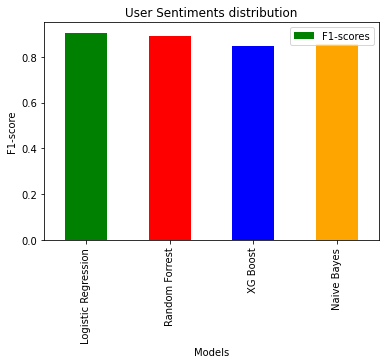

In [47]:
plt.figure(figsize=(15,10))
F1_DF.plot.bar(x='Model',y='F1-scores',color=['green', 'red','blue','orange'])
plt.title("User Sentiments distribution")
plt.xlabel('Models')
plt.ylabel('F1-score')

##### So based on our modelling we find that Logistic Regression Model has produced the best model for classification of Positive or Negative User Reviews

In [48]:
#Adding output of Logistic Regression Model to our dataset which will be used to fine tune our recommendation engine
reviews['Sentiment Prediction']= y_logistic_regression
reviews

,id,reviews_didPurchase,reviews_rating,reviews_text,reviews_title,reviews_username,name,user_sentiment,clean_text,rating_class,Sentiment Prediction
1,AV14LG0R-jtxr-f38QfS,True,5,Good flavor. This review was collected as part...,Good,dorothy w,Lundberg Organic Cinnamon Toast Rice Cakes,Positive,good flavor review collect part promotion,1,1
2,AV14LG0R-jtxr-f38QfS,True,5,Good flavor.,Good,dorothy w,Lundberg Organic Cinnamon Toast Rice Cakes,Positive,good flavor,1,1
3,AV16khLE-jtxr-f38VFn,False,1,I read through the reviews on here before look...,Disappointed,rebecca,K-Y Love Sensuality Pleasure Gel,Negative,read review look buy one couple lubricants ult...,0,0
4,AV16khLE-jtxr-f38VFn,False,1,My husband bought this gel for us. The gel cau...,Irritation,walker557,K-Y Love Sensuality Pleasure Gel,Negative,husband buy gel us gel cause irritation felt l...,0,0
5,AV16khLE-jtxr-f38VFn,False,1,My boyfriend and I bought this to spice things...,Not worth it,samantha,K-Y Love Sensuality Pleasure Gel,Negative,boyfriend buy spice things bedroom highly disa...,0,0
...,...,...,...,...,...,...,...,...,...,...,...
29995,AVpfW8y_LJeJML437ySW,False,5,I got this conditioner with Influenster to try...,Softness!!,laurasnchz,L'or233al Paris Elvive Extraordinary Clay Reba...,Positive,get conditioner influenster try im love far oi...,1,1
29996,AVpfW8y_LJeJML437ySW,False,5,"I love it , I received this for review purpose...",I love it,scarlepadilla,L'or233al Paris Elvive Extraordinary Clay Reba...,Positive,love receive review purpose influenster leave ...,1,1
29997,AVpfW8y_LJeJML437ySW,False,5,First of all I love the smell of this product....,Hair is so smooth after use,liviasuexo,L'or233al Paris Elvive Extraordinary Clay Reba...,Positive,first love smell product wash hair smooth easy...,1,1
29998,AVpfW8y_LJeJML437ySW,False,5,I received this through Influenster and will n...,Perfect for my oily hair!,ktreed95,L'or233al Paris Elvive Extraordinary Clay Reba...,Positive,receive influenster never go back anything els...,1,0


In [49]:
# Save the dataframe to a csv
reviews.to_csv('reviews.csv')

### Recommendation System

In [50]:
# dropping ALL duplicate values
reviews.drop_duplicates(subset ="reviews_username",
                     keep = False, inplace = True)
 
# displaying data
reviews.head(5)

,id,reviews_didPurchase,reviews_rating,reviews_text,reviews_title,reviews_username,name,user_sentiment,clean_text,rating_class,Sentiment Prediction
4,AV16khLE-jtxr-f38VFn,False,1,My husband bought this gel for us. The gel cau...,Irritation,walker557,K-Y Love Sensuality Pleasure Gel,Negative,husband buy gel us gel cause irritation felt l...,0,0
6,AV16khLE-jtxr-f38VFn,False,1,Bought this earlier today and was excited to c...,Disappointing,raeanne,K-Y Love Sensuality Pleasure Gel,Negative,buy earlier today excite check base product de...,0,0
9,AV16khLE-jtxr-f38VFn,False,1,Got as a surprise for my husband there is noth...,Don't buy,moore222,K-Y Love Sensuality Pleasure Gel,Positive,get surprise husband nothing special lube save...,1,0
11,AV16khLE-jtxr-f38VFn,False,1,Purchased this thinking it would have some sor...,Waste of Money,bre234,K-Y Love Sensuality Pleasure Gel,Positive,purchase think would sort warm effect original...,1,0
13,AV16khLE-jtxr-f38VFn,False,1,I bought this after really liking the his n he...,Not happy with this product,gordy313,K-Y Love Sensuality Pleasure Gel,Negative,buy really like n variety nothing like disappo...,0,0


In [51]:
# pivot ratings into Product features
final_ratings_matrix = reviews.pivot(index = 'reviews_username', columns = 'name', values = 'reviews_rating').fillna(0)


In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(reviews, test_size = 0.30, random_state = 42)

print(X_train.shape)
print(X_test.shape)

(9490, 11)
(4068, 11)


In [53]:
# pivot ratings into Product features
user_data = X_train.pivot(index = 'reviews_username', columns = 'name', values = 'reviews_rating').fillna(0)
user_data.head()

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),"2x Ultra Era with Oxi Booster, 50fl oz",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,Africa's Best No-Lye Dual Conditioning Relaxer System Super,"All,bran Complete Wheat Flakes, 18 Oz.",Ambi Complexion Cleansing Bar,Annie's Homegrown Gluten Free Double Chocolate Chip Granola Bars,Arrid Extra Dry Anti-Perspirant Deodorant Spray Regular,"Aussie Aussome Volume Shampoo, 13.5 Oz",...,"Tree Hut Shea Body Butters, Coconut Lime, 7 oz",Tresemme Kertatin Smooth Infusing Conditioning,Various Artists - Choo Choo Soul (cd),Vaseline Intensive Care Healthy Hands Stronger Nails,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz",Wagan Smartac 80watt Inverter With Usb,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0325home,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
06stidriver,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.11E+24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10ten,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Create a Copy of train and test dataset
These datasets will be used for prediction and evaluation.

Dummy train will be used later for prediction of the products which has not been rated by the user. To ignore the products rated by the user, we will mark it as 0 during prediction. The products not rated by user is marked as 1 for prediction.

Dummy test will be used for evaluation. To evaluate, we will only make prediction on the products rated by the user. So, this is marked as 1. This is just opposite of dummy_train

In [54]:
# make a copy of train and test datasets
dummy_train = X_train.copy()
dummy_test = X_test.copy()

dummy_train['reviews_rating'] = dummy_train['reviews_rating'].apply(lambda x: 0 if x > 0 else 1)
dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x: 1 if x > 0 else 0)

In [55]:
# The products not rated by user is marked as 1 for prediction 
dummy_train = dummy_train.pivot(index = 'reviews_username', columns = 'name', values = 'reviews_rating').fillna(1)

# The products not rated by user is marked as 0 for evaluation 
dummy_test = dummy_test.pivot(index ='reviews_username', columns = 'name', values = 'reviews_rating').fillna(0)

In [56]:
dummy_train.head()

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),"2x Ultra Era with Oxi Booster, 50fl oz",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,Africa's Best No-Lye Dual Conditioning Relaxer System Super,"All,bran Complete Wheat Flakes, 18 Oz.",Ambi Complexion Cleansing Bar,Annie's Homegrown Gluten Free Double Chocolate Chip Granola Bars,Arrid Extra Dry Anti-Perspirant Deodorant Spray Regular,"Aussie Aussome Volume Shampoo, 13.5 Oz",...,"Tree Hut Shea Body Butters, Coconut Lime, 7 oz",Tresemme Kertatin Smooth Infusing Conditioning,Various Artists - Choo Choo Soul (cd),Vaseline Intensive Care Healthy Hands Stronger Nails,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz",Wagan Smartac 80watt Inverter With Usb,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0325home,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
06stidriver,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1.11E+24,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
10ten,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [57]:
dummy_test.head()

name,4C Grated Parmesan Cheese 100% Natural 8oz Shaker,Africa's Best No-Lye Dual Conditioning Relaxer System Super,"All,bran Complete Wheat Flakes, 18 Oz.",Annie's Homegrown Gluten Free Double Chocolate Chip Granola Bars,Arrid Extra Dry Anti-Perspirant Deodorant Spray Regular,"Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter","Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium",Bedtime Originals Pinkie Musical Mobile,...,Various Artists - Choo Choo Soul (cd),Vaseline Intensive Care Healthy Hands Stronger Nails,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,Walkers Stem Ginger Shortbread,Wilton Black Dots Standard Baking Cups,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
09mommy11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1234561,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123soccermom,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### User based Collaborative Filtering

#### As this is a Sparse Matrix , we shall use Singular Value Decomposition

In [58]:
from scipy.sparse.linalg import svds

In [59]:
# Singular Value Decomposition
U, sigma, Vt = svds(user_data, k = 10)

In [60]:
# Construct diagonal array in SVD
sigma = np.diag(sigma)
print('Diagonal matrix: \n',sigma)

Diagonal matrix: 
 [[ 48.56953778   0.           0.           0.           0.
    0.           0.           0.           0.           0.        ]
 [  0.          54.19409562   0.           0.           0.
    0.           0.           0.           0.           0.        ]
 [  0.           0.          60.88513776   0.           0.
    0.           0.           0.           0.           0.        ]
 [  0.           0.           0.          60.95900262   0.
    0.           0.           0.           0.           0.        ]
 [  0.           0.           0.           0.          64.00781202
    0.           0.           0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
   96.45206063   0.           0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
    0.          98.           0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
    0.           0.      

In [61]:
#Predicted ratings
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 
# Convert predicted ratings to dataframe
preds_df = pd.DataFrame(all_user_predicted_ratings, columns = user_data.columns)
preds_df.head()

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),"2x Ultra Era with Oxi Booster, 50fl oz",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,Africa's Best No-Lye Dual Conditioning Relaxer System Super,"All,bran Complete Wheat Flakes, 18 Oz.",Ambi Complexion Cleansing Bar,Annie's Homegrown Gluten Free Double Chocolate Chip Granola Bars,Arrid Extra Dry Anti-Perspirant Deodorant Spray Regular,"Aussie Aussome Volume Shampoo, 13.5 Oz",...,"Tree Hut Shea Body Butters, Coconut Lime, 7 oz",Tresemme Kertatin Smooth Infusing Conditioning,Various Artists - Choo Choo Soul (cd),Vaseline Intensive Care Healthy Hands Stronger Nails,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz",Wagan Smartac 80watt Inverter With Usb,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
0,-1.203513e-31,-2.770881e-34,2.729754e-31,2.846177e-31,-3.935001e-32,8.453596e-32,-2.967280e-31,8.118286e-32,-7.557268e-32,-1.626917e-32,...,1.022627e-31,-9.474116e-33,1.773230e-31,6.290682e-33,4.483700e-32,-3.452476e-33,2.092231e-31,2.243573e-16,-3.862321e-33,1.396657e-31
1,1.683225e-16,3.783446e-19,-3.733358e-16,-3.831250e-16,5.322230e-17,-1.175649e-16,3.984219e-16,-1.137896e-16,9.954982e-17,7.280584e-17,...,-1.157934e-16,9.482214e-18,-2.216465e-16,-3.621229e-17,-2.806032e-16,2.887796e-17,-2.935610e-16,-5.202988e-17,-7.404979e-18,-1.657367e-16
2,1.683225e-16,3.783446e-19,-3.733358e-16,-3.831250e-16,5.322230e-17,-1.175649e-16,3.984219e-16,-1.137896e-16,9.954982e-17,7.280584e-17,...,-1.157934e-16,9.482214e-18,-2.216465e-16,-3.621229e-17,-2.806032e-16,2.887796e-17,-2.935610e-16,-5.202988e-17,-7.404979e-18,-1.657367e-16
3,1.683225e-16,3.783446e-19,-3.733358e-16,-3.831250e-16,5.322230e-17,-1.175649e-16,3.984219e-16,-1.137896e-16,9.954982e-17,7.280584e-17,...,-1.157934e-16,9.482214e-18,-2.216465e-16,-3.621229e-17,-2.806032e-16,2.887796e-17,-2.935610e-16,-5.202988e-17,-7.404979e-18,-1.657367e-16
4,1.982474e-33,4.178508e-36,-3.707240e-33,-3.429496e-33,6.727688e-34,-1.062179e-33,4.916825e-33,-1.208960e-33,3.134432e-34,5.593249e-33,...,5.746511e-34,-2.464968e-34,1.916917e-33,-2.439215e-33,-2.427511e-32,2.222452e-33,-1.995572e-33,-8.703572e-18,-7.084655e-34,7.301086e-34


In [62]:
# np.multiply for cell-by-cell multiplication 

user_based_final_ratings = np.multiply(preds_df, dummy_train)


In [63]:
# Setting user name as index
user_based_final_ratings['reviews_username'] = X_train['reviews_username'].values
user_based_final_ratings.set_index(["reviews_username"], inplace=True)
user_based_final_ratings

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),"2x Ultra Era with Oxi Booster, 50fl oz",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,Africa's Best No-Lye Dual Conditioning Relaxer System Super,"All,bran Complete Wheat Flakes, 18 Oz.",Ambi Complexion Cleansing Bar,Annie's Homegrown Gluten Free Double Chocolate Chip Granola Bars,Arrid Extra Dry Anti-Perspirant Deodorant Spray Regular,"Aussie Aussome Volume Shampoo, 13.5 Oz",...,"Tree Hut Shea Body Butters, Coconut Lime, 7 oz",Tresemme Kertatin Smooth Infusing Conditioning,Various Artists - Choo Choo Soul (cd),Vaseline Intensive Care Healthy Hands Stronger Nails,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz",Wagan Smartac 80watt Inverter With Usb,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
trisha2222,-1.203513e-31,-2.770881e-34,2.729754e-31,2.846177e-31,-3.935001e-32,8.453596e-32,-2.967280e-31,8.118286e-32,-7.557268e-32,-1.626917e-32,...,1.022627e-31,-9.474116e-33,1.773230e-31,6.290682e-33,4.483700e-32,-3.452476e-33,2.092231e-31,2.243573e-16,-3.862321e-33,1.396657e-31
mistletoe22,1.683225e-16,3.783446e-19,-3.733358e-16,-3.831250e-16,5.322230e-17,-1.175649e-16,3.984219e-16,-1.137896e-16,9.954982e-17,7.280584e-17,...,-1.157934e-16,9.482214e-18,-2.216465e-16,-3.621229e-17,-2.806032e-16,2.887796e-17,-2.935610e-16,-5.202988e-17,-7.404979e-18,-1.657367e-16
bearp62,1.683225e-16,3.783446e-19,-3.733358e-16,-3.831250e-16,5.322230e-17,-1.175649e-16,3.984219e-16,-1.137896e-16,9.954982e-17,7.280584e-17,...,-1.157934e-16,9.482214e-18,-2.216465e-16,-3.621229e-17,-2.806032e-16,2.887796e-17,-2.935610e-16,-5.202988e-17,-7.404979e-18,-1.657367e-16
cdhlwh,1.683225e-16,3.783446e-19,-3.733358e-16,-3.831250e-16,5.322230e-17,-1.175649e-16,3.984219e-16,-1.137896e-16,9.954982e-17,7.280584e-17,...,-1.157934e-16,9.482214e-18,-2.216465e-16,-3.621229e-17,-2.806032e-16,2.887796e-17,-2.935610e-16,-5.202988e-17,-7.404979e-18,-1.657367e-16
socalgalpd,1.982474e-33,4.178508e-36,-3.707240e-33,-3.429496e-33,6.727688e-34,-1.062179e-33,4.916825e-33,-1.208960e-33,3.134432e-34,0.000000e+00,...,5.746511e-34,-2.464968e-34,1.916917e-33,-2.439215e-33,-2.427511e-32,2.222452e-33,-1.995572e-33,-8.703572e-18,-7.084655e-34,7.301086e-34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cozygirl,-1.998286e-16,-4.199329e-19,4.097792e-16,4.203661e-16,-6.185463e-17,1.224661e-16,-4.612049e-16,1.268005e-16,-9.748067e-17,-9.259302e-18,...,1.019843e-16,-8.013793e-18,1.649002e-16,1.245191e-17,1.445381e-16,-6.034192e-18,3.383168e-16,1.172193e-15,-4.276421e-18,1.736230e-16
mestephens,1.683225e-16,3.783446e-19,-3.733358e-16,-3.831250e-16,5.322230e-17,-1.175649e-16,3.984219e-16,-1.137896e-16,9.954982e-17,7.280584e-17,...,-1.157934e-16,9.482214e-18,-2.216465e-16,-3.621229e-17,-2.806032e-16,2.887796e-17,-2.935610e-16,-5.202988e-17,-7.404979e-18,-1.657367e-16
gina5,1.683225e-16,3.783446e-19,-3.733358e-16,-3.831250e-16,5.322230e-17,-1.175649e-16,3.984219e-16,-1.137896e-16,9.954982e-17,7.280584e-17,...,-1.157934e-16,9.482214e-18,-2.216465e-16,-3.621229e-17,-2.806032e-16,2.887796e-17,-2.935610e-16,-5.202988e-17,-7.404979e-18,-1.657367e-16


In [64]:
# Prediction for user 'trisha2222'
user_based_final_ratings.loc['trisha2222'].sort_values(ascending=False)[0:5]

name
Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter    4.701654e-16
Burt's Bees Lip Shimmer, Raisin                                                    2.918953e-16
Windex Original Glass Cleaner Refill 67.6oz (2 Liter)                              2.243573e-16
Olay Regenerist Deep Hydration Regenerating Cream                                  6.630807e-18
Hormel Chili, No Beans                                                             4.267782e-31
Name: trisha2222, dtype: float64

#### Evaluation



In [65]:
# Actual ratings given by the users
final_ratings_matrix.head()

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),"2x Ultra Era with Oxi Booster, 50fl oz",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,Africa's Best No-Lye Dual Conditioning Relaxer System Super,"All,bran Complete Wheat Flakes, 18 Oz.",Ambi Complexion Cleansing Bar,Annie's Homegrown Gluten Free Double Chocolate Chip Granola Bars,Arrid Extra Dry Anti-Perspirant Deodorant Spray Regular,"Aussie Aussome Volume Shampoo, 13.5 Oz",...,Vaseline Intensive Care Healthy Hands Stronger Nails,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,Wilton Black Dots Standard Baking Cups,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00dog3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0325home,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
06stidriver,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
09mommy11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
# Average ACTUAL rating for each item
final_ratings_matrix.mean().head()

name
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest    0.001254
100:Complete First Season (blu-Ray)                              0.001475
2x Ultra Era with Oxi Booster, 50fl oz                           0.001770
4C Grated Parmesan Cheese 100% Natural 8oz Shaker                0.002213
Africa's Best No-Lye Dual Conditioning Relaxer System Super      0.001844
dtype: float64

In [67]:
# Predicted ratings 
preds_df.head()

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),"2x Ultra Era with Oxi Booster, 50fl oz",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,Africa's Best No-Lye Dual Conditioning Relaxer System Super,"All,bran Complete Wheat Flakes, 18 Oz.",Ambi Complexion Cleansing Bar,Annie's Homegrown Gluten Free Double Chocolate Chip Granola Bars,Arrid Extra Dry Anti-Perspirant Deodorant Spray Regular,"Aussie Aussome Volume Shampoo, 13.5 Oz",...,"Tree Hut Shea Body Butters, Coconut Lime, 7 oz",Tresemme Kertatin Smooth Infusing Conditioning,Various Artists - Choo Choo Soul (cd),Vaseline Intensive Care Healthy Hands Stronger Nails,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz",Wagan Smartac 80watt Inverter With Usb,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
0,-1.203513e-31,-2.770881e-34,2.729754e-31,2.846177e-31,-3.935001e-32,8.453596e-32,-2.967280e-31,8.118286e-32,-7.557268e-32,-1.626917e-32,...,1.022627e-31,-9.474116e-33,1.773230e-31,6.290682e-33,4.483700e-32,-3.452476e-33,2.092231e-31,2.243573e-16,-3.862321e-33,1.396657e-31
1,1.683225e-16,3.783446e-19,-3.733358e-16,-3.831250e-16,5.322230e-17,-1.175649e-16,3.984219e-16,-1.137896e-16,9.954982e-17,7.280584e-17,...,-1.157934e-16,9.482214e-18,-2.216465e-16,-3.621229e-17,-2.806032e-16,2.887796e-17,-2.935610e-16,-5.202988e-17,-7.404979e-18,-1.657367e-16
2,1.683225e-16,3.783446e-19,-3.733358e-16,-3.831250e-16,5.322230e-17,-1.175649e-16,3.984219e-16,-1.137896e-16,9.954982e-17,7.280584e-17,...,-1.157934e-16,9.482214e-18,-2.216465e-16,-3.621229e-17,-2.806032e-16,2.887796e-17,-2.935610e-16,-5.202988e-17,-7.404979e-18,-1.657367e-16
3,1.683225e-16,3.783446e-19,-3.733358e-16,-3.831250e-16,5.322230e-17,-1.175649e-16,3.984219e-16,-1.137896e-16,9.954982e-17,7.280584e-17,...,-1.157934e-16,9.482214e-18,-2.216465e-16,-3.621229e-17,-2.806032e-16,2.887796e-17,-2.935610e-16,-5.202988e-17,-7.404979e-18,-1.657367e-16
4,1.982474e-33,4.178508e-36,-3.707240e-33,-3.429496e-33,6.727688e-34,-1.062179e-33,4.916825e-33,-1.208960e-33,3.134432e-34,5.593249e-33,...,5.746511e-34,-2.464968e-34,1.916917e-33,-2.439215e-33,-2.427511e-32,2.222452e-33,-1.995572e-33,-8.703572e-18,-7.084655e-34,7.301086e-34


In [68]:
# Average PREDICTED rating for each item
preds_df.mean().head()

name
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest    8.756095e-17
100:Complete First Season (blu-Ray)                              1.948810e-19
2x Ultra Era with Oxi Booster, 50fl oz                          -1.980668e-16
4C Grated Parmesan Cheese 100% Natural 8oz Shaker               -2.039672e-16
Africa's Best No-Lye Dual Conditioning Relaxer System Super      2.754734e-17
dtype: float64

In [69]:
# Calculate RMSE
rmse_df = pd.concat([final_ratings_matrix.mean(), preds_df.mean()], axis=1)
rmse_df.columns = ['Avg_actual_ratings', 'Avg_predicted_ratings']
print(rmse_df.shape)
rmse_df['item_index'] = np.arange(0, rmse_df.shape[0], 1)
rmse_df.head()

(164, 2)


,Avg_actual_ratings,Avg_predicted_ratings,item_index
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,0.001254,8.756095e-17,0
100:Complete First Season (blu-Ray),0.001475,1.948810e-19,1
"2x Ultra Era with Oxi Booster, 50fl oz",0.001770,-1.980668e-16,2
4C Grated Parmesan Cheese 100% Natural 8oz Shaker,0.002213,-2.039672e-16,3
Africa's Best No-Lye Dual Conditioning Relaxer System Super,0.001844,2.754734e-17,4


In [70]:
RMSE = round((((rmse_df.Avg_actual_ratings - rmse_df.Avg_predicted_ratings) ** 2).mean() ** 0.5), 5)
print('\nRMSE of User User Collaborative filtering = {} \n'.format(RMSE))


RMSE of User User Collaborative filtering = 0.01297 



In [108]:
# Save the user similarity dataframe to a csv
user_based_final_ratings.to_csv('user_final_ratings.csv')

### Item based Collaborative Filtering

In [74]:
# pivot ratings into User Name
pivot_df = reviews.pivot(index = 'reviews_username', columns = 'name', values = 'reviews_rating').T.fillna(0)


In [75]:
# Test Train Split
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(reviews, test_size = 0.30, random_state = 40)

print(X_train.shape)
print(X_test.shape)

(9490, 11)
(4068, 11)


In [76]:
# make a copy of train and test datasets
dummy_train = X_train.copy()
dummy_test = X_test.copy()

dummy_train['reviews_rating'] = dummy_train['reviews_rating'].apply(lambda x: 0 if x > 0 else 1)
dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x: 1 if x > 0 else 0)

In [77]:
# The products not rated by user is marked as 1 for prediction 
dummy_train = dummy_train.pivot(index = 'reviews_username', columns = 'name', values = 'reviews_rating').T.fillna(1)

# The products not rated by user is marked as 0 for evaluation 
dummy_test = dummy_test.pivot(index = 'reviews_username', columns = 'name', values = 'reviews_rating').T.fillna(0)

In [78]:
# pivot ratings into Product features for training data
user_data = X_train.pivot(index = 'reviews_username', columns = 'name', values = 'reviews_rating').T.fillna(0)
user_data.head()

reviews_username,NaN,0325home,06stidriver,1.11E+24,1143mom,1234,1234561,1234567,123soccermom,12cass12,...,zombiejess,zookeeper,zoomin76,zozo0o,zsazsa,zwithanx,zxcsdfd,zxjki,zyiah4,zzz1127
name,,,,,,,,,,,,,,,,,,,,,
100:Complete First Season (blu-Ray),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"2x Ultra Era with Oxi Booster, 50fl oz",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4C Grated Parmesan Cheese 100% Natural 8oz Shaker,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Africa's Best No-Lye Dual Conditioning Relaxer System Super,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"All,bran Complete Wheat Flakes, 18 Oz.",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### As this is a Sparse Matrix , we shall use Singular Value Decomposition

In [79]:
from scipy.sparse.linalg import svds

In [80]:
# Singular Value Decomposition
U, sigma, Vt = svds(user_data, k = 10)

In [81]:
# Construct diagonal array in SVD
sigma = np.diag(sigma)
print('Diagonal matrix: \n',sigma)

Diagonal matrix: 
 [[ 50.0799361    0.           0.           0.           0.
    0.           0.           0.           0.           0.        ]
 [  0.          56.5862174    0.           0.           0.
    0.           0.           0.           0.           0.        ]
 [  0.           0.          58.05170109   0.           0.
    0.           0.           0.           0.           0.        ]
 [  0.           0.           0.          60.76183012   0.
    0.           0.           0.           0.           0.        ]
 [  0.           0.           0.           0.          63.182276
    0.           0.           0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
   97.08758932   0.           0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
    0.          98.48350116   0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
    0.           0.        

In [82]:
#Predicted ratings
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 
# Convert predicted ratings to dataframe
preds_df = pd.DataFrame(all_user_predicted_ratings, columns = user_data.columns)
preds_df.head()

reviews_username,NaN,0325home,06stidriver,1.11E+24,1143mom,1234,1234561,1234567,123soccermom,12cass12,...,zombiejess,zookeeper,zoomin76,zozo0o,zsazsa,zwithanx,zxcsdfd,zxjki,zyiah4,zzz1127
0,-6.869243e-31,-8.888554e-16,-8.888554e-16,-8.888554e-16,2.929810e-17,-7.110843e-16,-8.888554e-16,-8.888554e-16,-5.333132e-16,-8.888554e-16,...,-1.499601e-30,4.165865e-16,-5.299298e-16,7.479511e-31,4.165865e-16,-8.888554e-16,-8.888554e-16,-3.555421e-16,-8.888554e-16,-7.110843e-16
1,-9.994118e-33,-1.440065e-17,-1.440065e-17,-1.440065e-17,4.418408e-18,-1.152052e-17,-1.440065e-17,-1.440065e-17,-8.640391e-18,-1.440065e-17,...,-1.968061e-32,7.686978e-18,-9.233090e-18,4.963698e-33,7.686978e-18,-1.440065e-17,-1.440065e-17,-5.760261e-18,-1.440065e-17,-1.152052e-17
2,-7.946859e-31,-9.844524e-16,-9.844524e-16,-9.844524e-16,-1.004756e-16,-7.875619e-16,-9.844524e-16,-9.844524e-16,-5.906715e-16,-9.844524e-16,...,-1.815902e-30,3.643374e-16,-6.099266e-16,1.102999e-30,3.643374e-16,-9.844524e-16,-9.844524e-16,-3.937810e-16,-9.844524e-16,-7.875619e-16
3,3.198508e-31,4.347297e-16,4.347297e-16,4.347297e-16,-4.562000e-17,3.477837e-16,4.347297e-16,4.347297e-16,2.608378e-16,4.347297e-16,...,6.904210e-31,-2.081885e-16,2.658207e-16,-3.018026e-31,-2.081885e-16,4.347297e-16,4.347297e-16,1.738919e-16,4.347297e-16,3.477837e-16
4,-7.536123e-31,-9.468124e-16,-9.468124e-16,-9.468124e-16,-3.065012e-16,-7.574499e-16,-9.468124e-16,-9.468124e-16,-5.680874e-16,-9.468124e-16,...,-1.841698e-30,2.020713e-16,-5.997462e-16,1.428628e-30,2.020713e-16,-9.468124e-16,-9.468124e-16,-3.787250e-16,-9.468124e-16,-7.574499e-16


In [83]:
# np.multiply for cell-by-cell multiplication 

user_final_ratings = np.multiply(preds_df, dummy_train)

In [84]:
# Setting user name as index
user_final_ratings['name'] = user_data.T.columns.values
user_final_ratings.set_index(["name"], inplace=True)
user_final_ratings

reviews_username,NaN,0325home,06stidriver,1.11E+24,1143mom,1234,1234561,1234567,123soccermom,12cass12,...,zombiejess,zookeeper,zoomin76,zozo0o,zsazsa,zwithanx,zxcsdfd,zxjki,zyiah4,zzz1127
name,,,,,,,,,,,,,,,,,,,,,
100:Complete First Season (blu-Ray),-6.869243e-31,-8.888554e-16,-8.888554e-16,-8.888554e-16,2.929810e-17,-7.110843e-16,-8.888554e-16,-8.888554e-16,-5.333132e-16,-8.888554e-16,...,-1.499601e-30,4.165865e-16,-5.299298e-16,7.479511e-31,4.165865e-16,-8.888554e-16,-8.888554e-16,-3.555421e-16,-8.888554e-16,-7.110843e-16
"2x Ultra Era with Oxi Booster, 50fl oz",-9.994118e-33,-1.440065e-17,-1.440065e-17,-1.440065e-17,4.418408e-18,-1.152052e-17,-1.440065e-17,-1.440065e-17,-8.640391e-18,-1.440065e-17,...,-1.968061e-32,7.686978e-18,-9.233090e-18,4.963698e-33,7.686978e-18,-1.440065e-17,-1.440065e-17,-5.760261e-18,-1.440065e-17,-1.152052e-17
4C Grated Parmesan Cheese 100% Natural 8oz Shaker,-7.946859e-31,-9.844524e-16,-9.844524e-16,-9.844524e-16,-1.004756e-16,-7.875619e-16,-9.844524e-16,-9.844524e-16,-5.906715e-16,-9.844524e-16,...,-1.815902e-30,3.643374e-16,-6.099266e-16,1.102999e-30,3.643374e-16,-9.844524e-16,-9.844524e-16,-3.937810e-16,-9.844524e-16,-7.875619e-16
Africa's Best No-Lye Dual Conditioning Relaxer System Super,3.198508e-31,4.347297e-16,4.347297e-16,4.347297e-16,-4.562000e-17,3.477837e-16,4.347297e-16,4.347297e-16,2.608378e-16,4.347297e-16,...,6.904210e-31,-2.081885e-16,2.658207e-16,-3.018026e-31,-2.081885e-16,4.347297e-16,4.347297e-16,1.738919e-16,4.347297e-16,3.477837e-16
"All,bran Complete Wheat Flakes, 18 Oz.",-7.536123e-31,-9.468124e-16,-9.468124e-16,-9.468124e-16,-3.065012e-16,-7.574499e-16,-9.468124e-16,-9.468124e-16,-5.680874e-16,-9.468124e-16,...,-1.841698e-30,2.020713e-16,-5.997462e-16,1.428628e-30,2.020713e-16,-9.468124e-16,-9.468124e-16,-3.787250e-16,-9.468124e-16,-7.574499e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wagan Smartac 80watt Inverter With Usb,-1.609059e-31,-3.350465e-16,-3.350465e-16,-3.350465e-16,3.265382e-16,-2.680372e-16,-3.350465e-16,-3.350465e-16,-2.010279e-16,-3.350465e-16,...,-2.338384e-31,2.348020e-16,-2.094662e-16,-2.382239e-31,2.348020e-16,-3.350465e-16,-3.350465e-16,-1.340186e-16,-3.350465e-16,-2.680372e-16
Wilton Black Dots Standard Baking Cups,1.794870e-31,2.950209e-16,2.950209e-16,2.950209e-16,-2.161058e-16,2.360167e-16,2.950209e-16,2.950209e-16,1.770125e-16,2.950209e-16,...,3.119620e-31,-1.986229e-16,1.864385e-16,8.036868e-32,-1.986229e-16,2.950209e-16,2.950209e-16,1.180084e-16,2.950209e-16,2.360167e-16
Windex Original Glass Cleaner Refill 67.6oz (2 Liter),-1.252866e-16,1.920219e-16,1.920219e-16,1.920219e-16,0.000000e+00,1.536175e-16,1.920219e-16,1.920219e-16,1.152131e-16,1.920219e-16,...,1.799587e-15,1.421176e-16,-1.348337e-16,-7.568228e-16,1.421176e-16,1.920219e-16,1.920219e-16,7.680876e-17,1.920219e-16,1.536175e-16


In [85]:
# Prediction for a user 
user_final_ratings.T.loc['1143mom'].sort_values(ascending=False)[0:5]

name
Pantene Pro-V Expert Collection Age Defy Conditioner    2.720252e-15
Vaseline Intensive Care Lip Therapy Cocoa Butter        2.174886e-15
Bounce Dryer Sheets, Fresh Linen, 160 sheets            1.790239e-15
Coty Airspun Face Powder, Translucent Extra Coverage    1.079752e-15
Vaseline Intensive Care Healthy Hands Stronger Nails    1.022752e-15
Name: 1143mom, dtype: float64

#### Evaluation

In [86]:
# Actual ratings given by the users
final_ratings_matrix.head()

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),"2x Ultra Era with Oxi Booster, 50fl oz",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,Africa's Best No-Lye Dual Conditioning Relaxer System Super,"All,bran Complete Wheat Flakes, 18 Oz.",Ambi Complexion Cleansing Bar,Annie's Homegrown Gluten Free Double Chocolate Chip Granola Bars,Arrid Extra Dry Anti-Perspirant Deodorant Spray Regular,"Aussie Aussome Volume Shampoo, 13.5 Oz",...,Vaseline Intensive Care Healthy Hands Stronger Nails,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,Wilton Black Dots Standard Baking Cups,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00dog3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0325home,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
06stidriver,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
09mommy11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [87]:
# Average ACTUAL rating for each item
final_ratings_matrix.mean().head()

name
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest    0.001254
100:Complete First Season (blu-Ray)                              0.001475
2x Ultra Era with Oxi Booster, 50fl oz                           0.001770
4C Grated Parmesan Cheese 100% Natural 8oz Shaker                0.002213
Africa's Best No-Lye Dual Conditioning Relaxer System Super      0.001844
dtype: float64

In [88]:
# Predicted ratings 
preds_df.head()

reviews_username,NaN,0325home,06stidriver,1.11E+24,1143mom,1234,1234561,1234567,123soccermom,12cass12,...,zombiejess,zookeeper,zoomin76,zozo0o,zsazsa,zwithanx,zxcsdfd,zxjki,zyiah4,zzz1127
0,-6.869243e-31,-8.888554e-16,-8.888554e-16,-8.888554e-16,2.929810e-17,-7.110843e-16,-8.888554e-16,-8.888554e-16,-5.333132e-16,-8.888554e-16,...,-1.499601e-30,4.165865e-16,-5.299298e-16,7.479511e-31,4.165865e-16,-8.888554e-16,-8.888554e-16,-3.555421e-16,-8.888554e-16,-7.110843e-16
1,-9.994118e-33,-1.440065e-17,-1.440065e-17,-1.440065e-17,4.418408e-18,-1.152052e-17,-1.440065e-17,-1.440065e-17,-8.640391e-18,-1.440065e-17,...,-1.968061e-32,7.686978e-18,-9.233090e-18,4.963698e-33,7.686978e-18,-1.440065e-17,-1.440065e-17,-5.760261e-18,-1.440065e-17,-1.152052e-17
2,-7.946859e-31,-9.844524e-16,-9.844524e-16,-9.844524e-16,-1.004756e-16,-7.875619e-16,-9.844524e-16,-9.844524e-16,-5.906715e-16,-9.844524e-16,...,-1.815902e-30,3.643374e-16,-6.099266e-16,1.102999e-30,3.643374e-16,-9.844524e-16,-9.844524e-16,-3.937810e-16,-9.844524e-16,-7.875619e-16
3,3.198508e-31,4.347297e-16,4.347297e-16,4.347297e-16,-4.562000e-17,3.477837e-16,4.347297e-16,4.347297e-16,2.608378e-16,4.347297e-16,...,6.904210e-31,-2.081885e-16,2.658207e-16,-3.018026e-31,-2.081885e-16,4.347297e-16,4.347297e-16,1.738919e-16,4.347297e-16,3.477837e-16
4,-7.536123e-31,-9.468124e-16,-9.468124e-16,-9.468124e-16,-3.065012e-16,-7.574499e-16,-9.468124e-16,-9.468124e-16,-5.680874e-16,-9.468124e-16,...,-1.841698e-30,2.020713e-16,-5.997462e-16,1.428628e-30,2.020713e-16,-9.468124e-16,-9.468124e-16,-3.787250e-16,-9.468124e-16,-7.574499e-16


In [89]:
# Average PREDICTED rating for User
preds_df.mean()

reviews_username
NaN            7.249529e-18
0325home       3.289474e-02
06stidriver    3.289474e-02
1.11E+24       3.289474e-02
1143mom        1.973684e-02
                   ...     
zwithanx       3.289474e-02
zxcsdfd        3.289474e-02
zxjki          1.315789e-02
zyiah4         3.289474e-02
zzz1127        2.631579e-02
Length: 9490, dtype: float64

In [90]:
# Calculate RMSE
rmse_df = pd.concat([final_ratings_matrix.T.mean(), preds_df.mean()], axis=1)
rmse_df.columns = ['Avg_actual_ratings', 'Avg_predicted_ratings']
print(rmse_df.shape)
rmse_df['item_index'] = np.arange(0, rmse_df.shape[0], 1)
rmse_df.head()

(13558, 2)


,Avg_actual_ratings,Avg_predicted_ratings,item_index
NaN,0.030488,7.249529e-18,0
00dog3,0.024390,NaN,1
0325home,0.030488,3.289474e-02,2
06stidriver,0.030488,3.289474e-02,3
09mommy11,0.030488,NaN,4


In [91]:
RMSE = round((((rmse_df.Avg_actual_ratings - rmse_df.Avg_predicted_ratings) ** 2).mean() ** 0.5), 5)
print('\nRMSE of Item Item Collaborative filtering = {} \n'.format(RMSE))


RMSE of Item Item Collaborative filtering = 0.01342 



In [92]:
# Save the Item similarity dataframe to a csv
user_final_ratings.to_csv('item_final_ratings.csv')

#### Based on our evaluation of RMSE we find that User based Collaborative filtering is yieling the best results. So we shall persist with that model for building our Recommendation System

### Finding the top 20 recommendation for the user

In [99]:
# Take the user Name as input
user_input = input("Enter your user name")
print(user_input)

Enter your user nametrisha2222
trisha2222


In [101]:
# Recommending the Top 20 products to the user.
res=user_based_final_ratings.loc[user_input].sort_values(ascending=False)[0:20]
res

name
Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter    4.701654e-16
Burt's Bees Lip Shimmer, Raisin                                                    2.918953e-16
Windex Original Glass Cleaner Refill 67.6oz (2 Liter)                              2.243573e-16
Olay Regenerist Deep Hydration Regenerating Cream                                  6.630807e-18
Hormel Chili, No Beans                                                             4.267782e-31
J.a. Henckels International 4-Pc Everedge Plus Steak Knife Set                     3.324061e-31
Clambake (dvd)                                                                     2.976252e-31
4C Grated Parmesan Cheese 100% Natural 8oz Shaker                                  2.846177e-31
Bedtime Originals Pinkie Musical Mobile                                            2.775720e-31
Spam Single Classic                                                                2.734834e-31
2x Ultra Era with Oxi Booster, 50fl

### Fine Tuning the Recommendation based on Products Sentiment

In [102]:
# Defining a Func which will take 20 recommendation based on Collaborative Recommendation model 
# and filter out 5 recommendation based on avg sentiment score for those recommendations
def sentiment_based_recommendation(user_input,user_based_final_ratings=user_based_final_ratings,setimentsDF=reviews):
    
    # Finding the Top 20 products to the user.
    res=user_based_final_ratings.loc[user_input].sort_values(ascending=False)[0:20]
    # Converting recommendation output to a dataframe
    resDF = pd.DataFrame({'name':res.index, 'Score':res.values})
    #Merging the results with our reviews dataset which contains Sentiment score based on Logistic Regression model
    df = pd.merge(resDF, setimentsDF, on=['name'])
    # Filtering top five products having highest sentiment score
    out=df.groupby('name')['Sentiment Prediction'].mean().sort_values(ascending=False)[0:5]
    print(out)
    
    

In [103]:
# Take the user Name as input
user_input = input("Enter your user name")
print(user_input)

Enter your user nametrisha2222
trisha2222


In [104]:
# Recommending the Top 5 products to the user based on their review sentiment and Collaborative recommendation.
sentiment_based_recommendation(user_input)

name
J.a. Henckels International 4-Pc Everedge Plus Steak Knife Set    1.0
Jergens Extra Moisturizing Liquid Hand Wash, 7.5oz                1.0
Clambake (dvd)                                                    1.0
Iman Luxury Moisturizing Lipstick, Black Brandy 006               1.0
2x Ultra Era with Oxi Booster, 50fl oz                            1.0
Name: Sentiment Prediction, dtype: float64
